In [1]:
# pip install baseflow

In [2]:
import baseflow
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('base_calibrated-wb-2014_2022-GW.csv', comment='#', index_col=0)

In [4]:
df['watershed boundary discharge [m^3/s]'] = df['watershed boundary discharge [m^3/d]'] / 86400
df = df[['watershed boundary discharge [m^3/s]']]
df

,watershed boundary discharge [m^3/s]
datetime,
2014-10-01,0.000000
2014-10-02,19.649874
2014-10-03,25.475582
2014-10-04,18.472775
2014-10-05,14.500972
...,...
2022-09-28,0.223149
2022-09-29,0.216615
2022-09-30,0.229072


In [5]:
# df_sta = pd.DataFrame(data=[107.05, 38.86, 53],
#                       index=df.columns, columns=['lon', 'lat', 'area'])

In [6]:
bf = baseflow.separation(df)

100%|██████████| 1/1 [00:15<00:00, 15.76s/it]


In [7]:
bf_ukih = bf['UKIH']

In [8]:
df = df[df.index >= '2015-10-01']
bf_ukih = bf_ukih[bf_ukih.index >= '2015-10-01']
bf_ukih

,watershed boundary discharge [m^3/s]
datetime,
2015-10-01,0.593842
2015-10-02,0.596626
2015-10-03,0.599410
2015-10-04,0.602194
2015-10-05,0.604978
...,...
2022-09-28,0.204625
2022-09-29,0.205769
2022-09-30,0.207050


<Axes: xlabel='datetime'>

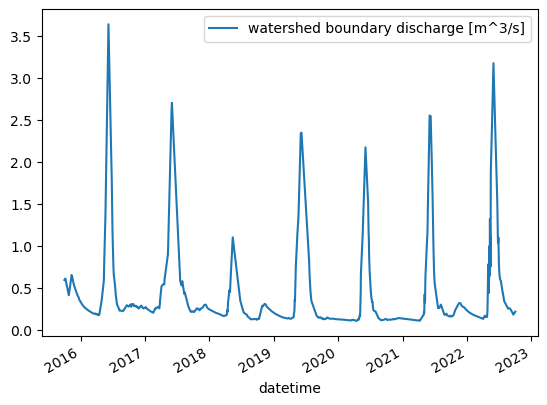

In [9]:
bf_ukih.plot()

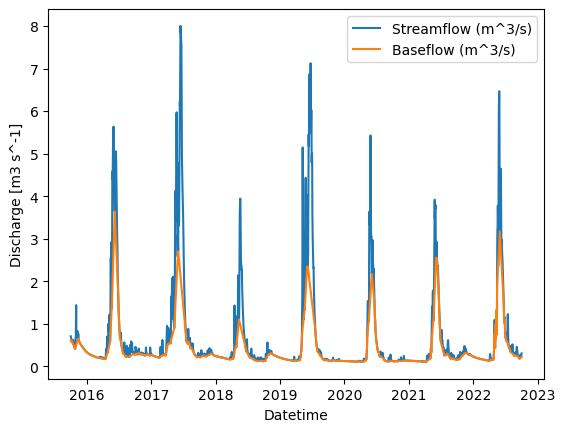

In [10]:
plt.figure()

plt.plot(df.index, df['watershed boundary discharge [m^3/s]'], label='Streamflow (m^3/s)')
plt.plot(df.index, bf_ukih['watershed boundary discharge [m^3/s]'], label='Baseflow (m^3/s)')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Discharge [m3 s^-1]')

# Adding legend
plt.legend()
# plt.savefig('original_baseflow_numerical_method.png', dpi = 600)
plt.show()

In [11]:
bf_ukih.to_csv('UKIH.csv')